# Numpy

- práce s vícerozměrnými poli (tenzory)
- efektivní operace implementované v C
- interface k operacím lineární algebry
- další funkce ...

[referenční dokumentace](https://docs.scipy.org/doc/numpy-1.13.0/reference/index.html)

Další zdroje:
- [Stanford lecture](https://web.stanford.edu/~schmit/cme193/lec/lec5.pdf)

- [100 cvičení z Numpy](http://yvesguidet.no-ip.biz/complementsMureaux/100_numpy_exercises.pdf)

- [Python and SciPy lecture notes](https://hal.inria.fr/hal-01206546/file/ScipyLectures-simple.pdf)

Dále předpokládáme import knihovny ve tvaru:


In [27]:
import numpy as np

## Array
- reprezentace N rozměrného tenzoru
- mnohé operace (řezání, transpozice) provádí jen změnu přístupu ke stále stejným datů

In [4]:
# Konverze ze standarnich Pythnonich typu.
list_matrix =[ list(range(3)), list(range(1,4))]
print("List matrix:", list_matrix)
a = np.array(list_matrix)
print("Numpy matrix:\n", a, '\npython type:', type(a))

# TODO: zkuste smazat list() na prvnim radku, bude to fungovat. range(..) produkuje sekvenci.

List matrix: [[0, 1, 2], [1, 2, 3]]
Numpy matrix:
 [[0 1 2]
 [1 2 3]] 
python type: <class 'numpy.ndarray'>


### Array - atributy

    a.ndim,  a.shape,  a.size,  a.dtype
   

In [5]:
# Počet dimenzí/os/axis pole
print("ndim", a.ndim)

# Rozměry pole v jednotlivých osách.
print("shape", a.shape)

# Počet prvků pole.
print("size", a.size)

# Type prvků pole (všechny prvky mají stejný typ).
print("dtype", a.dtype)


ndim 2
shape (2, 3)
size 6
dtype int64


Matice `a` má prvky typu `int64`. Numpy automaticky zvolí `int` pokud jsou všechny zadané prvky `int`. Explicitně je možno požadovat jiný typ pomocí parametru `dtype`:

In [6]:
from sys import getsizeof

print("float type:\n", np.array(list_matrix, dtype=float))
print("complex type:\n", np.array(list_matrix, dtype=complex))
print("bool type:\n", np.array(list_matrix, dtype=bool))

# Type variants with different memory footprint.
a8 = np.array(list_matrix, dtype="int8")
print("\nint8 type:\n", a8)
print("element type: ", a8.dtype)

print("a int 64 memory size:", getsizeof(a),)
print("a int 8 memory size:", getsizeof(a8))


float type:
 [[0. 1. 2.]
 [1. 2. 3.]]
complex type:
 [[0.+0.j 1.+0.j 2.+0.j]
 [1.+0.j 2.+0.j 3.+0.j]]
bool type:
 [[False  True  True]
 [ True  True  True]]

int8 type:
 [[0 1 2]
 [1 2 3]]
element type:  int8
a int 64 memory size: 160
a int 8 memory size: 118


### Inicializace array

In [ ]:
# sekvence: počátek, konec, krok
print("arange: ", np.arange(1.1, 10, 2.1))

# sekvence: počátek, konec, počet bodů
print("linspace: ", np.linspace(1.1, 10, 4))

# zeros, ones, eye, full
print("zeros :\n", np.zeros((2,4)))
print("ones :\n", np.ones((2,4)))
print("full :\n", np.full((2,4), 3.14))

# jednotkova matice
print("eye :\n", np.eye(4))

Další funkce pro tvorbu polí viz:

[Numpy doc: array creation routines](https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html)

Pro čtení polí (matic) z textových tabulek lze použít funkci 
- [`np.loadtxt`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html#numpy.loadtxt).
  EXTRÉMĚ pomalá
- [`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) nejrychlejší  čtení CSV souborů
- [`pandas.read_excel`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html#pandas.read_excel)
- [`pandas.ExcelWriter`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.ExcelWriter.html#pandas.ExcelWriter)
- [Pandas 10 min. tutorial](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#min)


In [11]:
import pandas as pd

dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df.head()

,A,B,C,D
2013-01-01,-1.014341,-2.552547,0.837562,-0.542377
2013-01-02,1.250934,1.275149,0.237195,0.923649
2013-01-03,-0.106908,1.714477,-1.286236,-0.796921
2013-01-04,0.329238,0.076959,2.058525,-0.987809
2013-01-05,-0.052404,0.822693,0.489656,-0.123740


In [12]:
with pd.ExcelWriter('ABCD_data.xlsx') as writer:
    df.to_excel(writer)
    
df2 = pd.read_excel('ABCD_data.xlsx')
df2.head()

,A,B,C,D
2013-01-01,-1.014341,-2.552547,0.837562,-0.542377
2013-01-02,1.250934,1.275149,0.237195,0.923649
2013-01-03,-0.106908,1.714477,-1.286236,-0.796921
2013-01-04,0.329238,0.076959,2.058525,-0.987809
2013-01-05,-0.052404,0.822693,0.489656,-0.123740


### Přetížené operátory
Binární operátory je možné provádět pro dvě pole se stejným `shape`.

In [7]:
a = np.array([[0,1,2], [1,2,3]])
b = np.ones((2,3))

In [8]:
a + b

array([[1., 2., 3.],
       [2., 3., 4.]])

In [9]:
a * b

array([[0., 1., 2.],
       [1., 2., 3.]])

In [10]:
a > b


array([[False, False,  True],
       [False,  True,  True]])

In [14]:
# I funkce lze aplikovat po jednotlivých elementech:
np.sin(np.pi * a / 2)

array([[ 0.0000000e+00,  1.0000000e+00,  1.2246468e-16],
       [ 1.0000000e+00,  1.2246468e-16, -1.0000000e+00]])

In [31]:
# Maticove nasobeni @
A = np.array([[0, 1], [2, 3]])
x = np.array([10, 100])
print("A = ", A, "\nx = ", x)
print("A @ x = ", A @ x)
print("np.dot = ", np.dot(A, x))
B = np.array([[3, 1], [0, 2]])
print(A @ B) 


A =  [[0 1]
 [2 3]] 
x =  [ 10 100]
A @ x =  [100 320]
np.dot =  [100 320]
[[0 2]
 [6 8]]


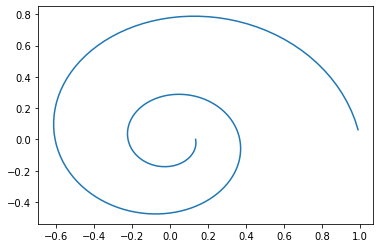

In [51]:
N = 200
theta = 2 * np.pi * 0.01
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c,-s), (s, c)))
S = 0.99 * np.eye(2)
points = np.zeros((N, 2))
x = np.array([1, 0])
for i in range(N):
    x = points[i] = S @ R @ x
import matplotlib.pyplot as plt
plt.plot(*points.T)

### Array indexing and slicing
Podpora více indexů najednou v hranatých závorkách pro indexování vícerozměrných polí.

Řez ve formě `[start : end : step]` vybere v jedné dimenzi pouze indexy začínající `start`, s krokem `step` a menší než `end`.

In [ ]:
# Více indexů povoleno
print(a)
a[0,1]

In [ ]:
# Pomocí řezů lze vybírat pod výběry.
# první sloupec
a[:, 0]

In [ ]:
# Druhý řádek, prvky 0..2
a[1, 0:2]

In [ ]:
# Poslední dva prvky druhého řádku
a[1, -3:-1]

In [ ]:
# První řádek pozpátku.
a[0,::-1]

In [ ]:
a[0, ...]

In [ ]:
# Konverze vektoru na matici, přidání axis
b=a[0]
print(b)
print(b[None, :])
print(b[:, None])

### Broadcasting
Pokud operandy nemají stejný tvar, je možno operaci provést pokud lze jeden operand rozšířit na shape druhého operandu:
1. Operand s nižším `ndim` se zleva doplní dimenzemi s rozměrem 1 do počtu dimenzí druhého operandu.
2. Pokud v některé dimenzi je rozměr jednoho operandu N a rozměr druhého 1. Druhý operand se v této ose použije N krát.

Obecná pravidla konverze polí menší dimenze na pole vyšší dimenze při (binárních) operacích:

[Numpy broadcasting](https://docs.scipy.org/doc/numpy-1.13.0/reference/ufuncs.html#broadcasting)

In [ ]:
# Nejjednodušší příklad, násobení skalárem
b = 2 * a
b

In [ ]:
# ... je ekvivalentní násobení maticí dvojek.
two = np.full((2,3), 2.0)
two * a

In [12]:
# Broadcasting pro vektor a matici.
a = np.arange(4).reshape((2,2))
print("a matrix:\n", a)
b = np.arange(3,5)
print("b vector:\n", b)
b+a

a matrix:
 [[0 1]
 [2 3]]
b vector:
 [3 4]


array([[3, 5],
       [5, 7]])

Explicitní broadcasting pomocí `None` indexu. Mnohem lepší srozumitelnost, vnější součin:

In [14]:
a = np.arange(4)
# outer product
a[None, :] * a[:, None] 

array([[0, 0, 0, 0],
       [0, 1, 2, 3],
       [0, 2, 4, 6],
       [0, 3, 6, 9]])

### Array reshaping

In [ ]:
# Rozbalení dat do prostého pole, může být vnitřně realizováno jen pomocí metadat.
# ... vrátí se "view".
b = a.ravel()
print(b)
b[0] =10
a

In [ ]:
# Stejné dělá metoda flatten, ale nyní vrací kopii skutčeně rozbalených dat. 
b = a.flatten()
print(b)
b[0] = 100
a

In [ ]:
# Změna tvaru pomocí přiřazení do attributu shape:
b.shape = (3, 2)
b

In [ ]:
# transpozice
a.T
a.transpose()

In [ ]:
# Obecná transpozice jak permutace axis.

# Třírozměrný tenzor, osy si označíme pomocí prvků 1,2,3 
xyz  = np.zeros( (2,2,2) )
xyz[0,0,0] = 111
xyz[1,0,0] = 1
xyz[0,1,0] = 2
xyz[0,0,1] = 3

print("\nxyz: \n", xyz)
# Prohodíme první a druhou osu:
print("\ntranspose: \n", xyz.transpose((1,0,2)))

## Operace s více poli.


### Array stacking
Posazení dvou matic (polí) nad sebe, vedle sebe ... 

In [ ]:
a= list_matrix =np.array([ list(range(3)), list(range(1,4))])
print(a)
b = a[0]
print(b)

In [ ]:
# Více polí stejného shape na pole vyšší dimenze. 
# Např. z vektorů udělat matici (vektory jako sloupce)
np.stack((a[0], a[1], b), axis=1)

In [ ]:
# To samé v řádcích
np.stack((a[0], a[1], b), axis=0)

In [ ]:
# Více polí různý shape, zachování dimenze. Stejný shape kolmo na axise slučování.
np.concatenate((a, b[None,:]), axis=0) # V axis 1 stejný shape. 

## Basic operations
Get help and try functions:
- min(), max(), maximum(), minimum()
- average(), mean()
- diff()
- dot()
- sum(), prod(), cumsum(), cumprod()

### Linear algebra

In [ ]:
from numpy import la


## `la` - klíčové funkce

- la.norm()
- la.solve(), la.lu(), la.cholesky(), la.qr()
- la.eig(), la.svd()

np.fft module

In [ ]:
# TODO: vyzkousejte la.eig pro vypoctenou matici P.T @ D @ P.

# Cvičení

## Elipsy
Parametrická rovnice elipsy s poloosami $a$, $b$ je:
        
$$x = a\cos\phi,\quad y = b\sin\phi$$

1. Vypočtěte N bodů na elipse a sestavte je do matice s řádky X a Y.
1. Body zobrazte pomocí `plt.scatter`.
1. Sestavte matici rotace o 45 stupňů:

  $$Rot(\phi) = \begin{bmatrix} \cos\phi & -\sin\phi\\ \sin\phi & \cos\phi\end{bmatrix}$$ 
1. Otočte body na elipse pomocí této matice, zobrazte obě matice do stejného grafu.
1. Zobrazte $k$ takovýchto elips s úhlem otočení $\phi=2\pi i/n$, $k=17$, $N=31$, $a=3$, $b=1$.
  Experimentujte s různými hodnotami.

## 
1. Nastudujte a vyzkoušejte si základní funkce z modulu np.random:
   
   random, rand, seed, choice
   
2. Vygenerujte:
   
   - náhodnou matici A, shape (3, 3)
   - náhodný vektor b, shape (3, )
   
3. vyřešte soustavu $Ax=b$ a ověřte řešení pomocí výpočtu $Ax - b$

4. Vygenerujte pole dvojic náhodných bodů (úseček) v jednotkovém čtverci, jako matici (N, 2, 2)

5. Vypočtěte pole délek úseček (jednořádkový  kód).

6. Vytvořte pole X, Y, Z, kde X obsahuje x souřednice prvních bodů, Y je y souřadnice prvních bodů, z je logaritmus délek úseček.

7. Vypočtěte průmernou délku úseček a směrodatnou odchylku.

8. Náročnější úkol, působení hmotných bodů: 
    
   1. Vygenerujte náhodné pole bodů v jednotkové krychli a pole náhodných hmotností těchto bodů (libovolně).
   2. Napište funkci, která pro zadaný index $i$. Vypočte sílu kterou na hmotný bod $X_i$ působí ostatní hmotné body:
      
      $$ F_i = \sum_{j\ne i} G \frac{m_i m_j}{|R_{ij}|^3} R_{ij},\quad R_{ij}  =  X_i - X_j$$


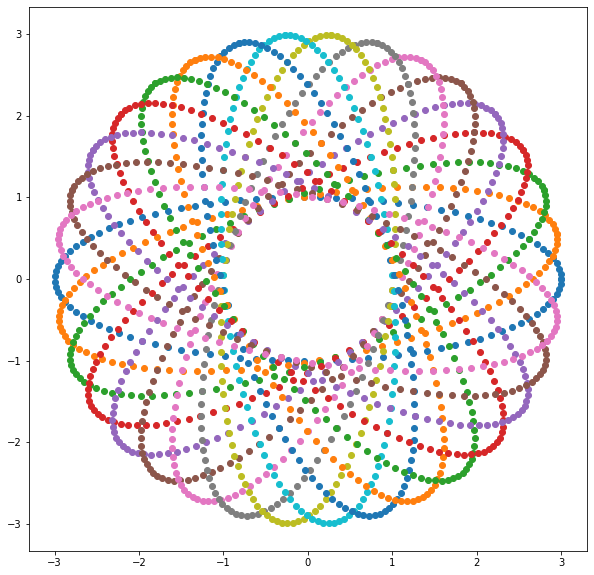

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def rot_mat(angle):
    return np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])

a, b = 3, 1
n = 17
N = 100

fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i in range(n):
    t = np.linspace(0, 2 * np.pi, N)
    XY = np.stack((a * np.cos(t), b * np.sin(t)))
    XY = rot_mat(np.pi * i / n) @ XY
    ax.scatter(*XY)


In [ ]:
L=la.norm( mat[:,1,:] - mat[:,0,:], axis=1)
X = mat[:, 0, 0]
Z = np.log(L)